<a href="https://colab.research.google.com/github/shruti-madhav/Sentiment_Analysis/blob/main/Sentimnt_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autocorrect
!pip install neattext

**Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext as nt
import neattext.functions as nfs
import re
from autocorrect import Speller

**Reading the data.**

In [3]:
# Dataset from kaggle
data = pd.read_csv('/content/drive/MyDrive/tweets.csv', encoding="ISO-8859-1")
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**Adding the column names.**

In [4]:
data.columns = ['sentiment', 'tweet_id', 'date', 'flag', 'user', 'content']

In [5]:
data.head()

,sentiment,tweet_id,date,flag,user,content
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
data.shape

(1599999, 6)

# **Sentiment column has already being annoted to**

**0 -> negative**


**2 -> neutral**


**4 -> positive**

**Let's check for null values**

In [7]:
data.isnull().sum()

sentiment    0
tweet_id     0
date         0
flag         0
user         0
content      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   tweet_id   1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user       1599999 non-null  object
 5   content    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
data.describe()

,sentiment,tweet_id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [10]:
data['sentiment'].unique()

array([0, 4])

**Plot for Count of the two sentiments**

<Axes: xlabel='sentiment', ylabel='count'>

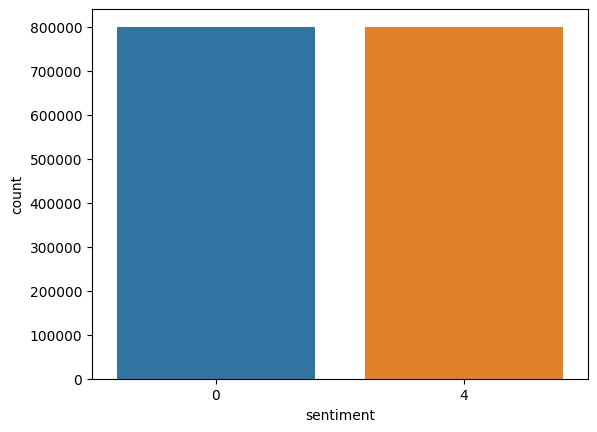

In [11]:
sns.countplot(x='sentiment', data=data)

**This shows that the sentiments are highly balanced.**

But also that we only have two sentiments which are negative and positive.

# **Text Processing**

## **Handling Contractions**

Expanding the contractions (who don't know =>  "can't" to "cannot").

In [12]:
# for fixing the contractions
data['content']=[nt.fix_contractions(text) for text in data['content']]

## **LowerCasing**

Converting all text to lowercase to ensure uniformity and will help in reducing the dimensionality of the data.

In [13]:
#Lowercasing -  Convert all text to lowercase. This ensures uniformity and helps in reducing the dimensionality of the data.
data['content']=data['content'].str.lower()
data.head()

,sentiment,tweet_id,date,flag,user,content
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cannot update his facebook by...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it is not behaving at all..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@kwesidei not the whole crew


## **Punctuation Removal**

Removing all punctuation marks (which are periods, commas, exclamation marks) as they generally aren't much of any information for many NLP tasks.


In [14]:
data['content']=[nt.remove_punctuations(text) for text in data['content']]
print(data['content'][:10])

0    is upset that he cannot update his facebook by...
1    @kenichan i dived many times for the ball mana...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no it is not behaving at all ...
4                        @kwesidei not the whole crew 
5                                          need a hug 
6    @loltrish hey  long time no see yes rains a bi...
7                 @tatianak nope they did not have it 
8                             @twittera que me muera  
9            spring break in plain city it is snowing 
Name: content, dtype: object


## **StopWord Removal**

Removing common, low-information words (mostly "and", "the", "in") known as stopwords. They don't add much value either.

In [15]:
data['content']=[nt.remove_stopwords(text) for text in data['content']]
print(data['content'][:10])

0    upset update facebook texting cry result schoo...
1    @kenichan dived times ball managed save 50% re...
2                           body feels itchy like fire
3                        @nationwideclass behaving mad
4                                       @kwesidei crew
5                                             need hug
6    @loltrish hey long time yes rains bit bit lol ...
7                                       @tatianak nope
8                                  @twittera que muera
9                      spring break plain city snowing
Name: content, dtype: object


## **Number Removal**

Removing all the numbers

In [16]:
data['content']=[nt.remove_numbers(text) for text in data['content']]
print(data['content'][:10])

0    upset update facebook texting cry result schoo...
1    @kenichan dived times ball managed save % rest...
2                           body feels itchy like fire
3                        @nationwideclass behaving mad
4                                       @kwesidei crew
5                                             need hug
6    @loltrish hey long time yes rains bit bit lol ...
7                                       @tatianak nope
8                                  @twittera que muera
9                      spring break plain city snowing
Name: content, dtype: object


## **SpecialCharaters Removal**

Removing any non-alphabetic characters. These often do not contribute to the semantics of the text also why you need them (in NLP Tasks :p)

In [17]:
data['content']=[nt.remove_special_characters(text) for text in data['content']]
print(data['content'][:10])

0    upset update facebook texting cry result schoo...
1    kenichan dived times ball managed save  rest b...
2                           body feels itchy like fire
3                         nationwideclass behaving mad
4                                        kwesidei crew
5                                             need hug
6    loltrish hey long time yes rains bit bit lol f...
7                                        tatianak nope
8                                   twittera que muera
9                      spring break plain city snowing
Name: content, dtype: object


## **HTMLTags, URLs and Emoji Removal**

Self explainatory removing everything mentioned above.

In [18]:
# for removing html tags from the text.
data['content']=[nt.remove_html_tags(text) for text in data['content']]

# for removing urls from the text.
data['content']=[nt.remove_urls(text) for text in data['content']]

# for removing emojis from the text.
data['content']=[nt.remove_emojis(text) for text in data['content']]

print(data['content'][:10])

0    upset update facebook texting cry result schoo...
1    kenichan dived times ball managed save  rest b...
2                           body feels itchy like fire
3                         nationwideclass behaving mad
4                                        kwesidei crew
5                                             need hug
6    loltrish hey long time yes rains bit bit lol f...
7                                        tatianak nope
8                                   twittera que muera
9                      spring break plain city snowing
Name: content, dtype: object


## **SpellCheck**

Checking and replacing the correct spellings.

In [ ]:
sentence=['upst', 'updat', 'facebook', 'texting', 'cry', 'result', 'scholl', 'today', 'blah']
from spellchecker import SpellChecker
import pandas as pd

spell = SpellChecker()
def spell_check_and_replace(sentence):

    misspelled = spell.unknown(sentence)
    # Correct misspelled words
    for word in sentence:
        if word in misspelled:
          pd.DataFrame(sentence).replace(word, spell.correction(word))
            # sentence.append(spell.correction(word))
        else:
            sentence.append(word)

    return(sentence)
spell_check_and_replace(sentence)
print(sentence)

In [23]:
# from spellchecker import SpellChecker

# spell = SpellChecker()

# # find those words that may be misspelled
# misspelled = spell.unknown(data['content'])

# for word in misspelled:
#     # Get the one most likely answer
#     spell.correction(word)

# data['content'].append()

AttributeError: ignored

## **Tokenization**

In [20]:
# !pip install nltk
import nltk

from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenize a sentence into words
data['content'] = [word_tokenize(text) for text in data['content']]

print("Word Tokens:", data['content'][0])

Word Tokens: ['upset', 'update', 'facebook', 'texting', 'cry', 'result', 'school', 'today', 'blah']


In [21]:
data.head()

,sentiment,tweet_id,date,flag,user,content
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[upset, update, facebook, texting, cry, result..."
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[kenichan, dived, times, ball, managed, save, ..."
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[body, feels, itchy, like, fire]"
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[nationwideclass, behaving, mad]"
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,"[kwesidei, crew]"


VADER - old model
      - bag of words approach
      
RoBERTa - Pretrained model
        - from hugging face